In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("all_data.csv")
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [2]:
print(df.describe())

              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13


In [3]:
# Our goal of the project is to investigate the relationship between GDP and life expectancy. We have 96 entries from several countries and several years. 
# We can plot years and countries later, but the first setp should be to graph life expectancy against GDP.

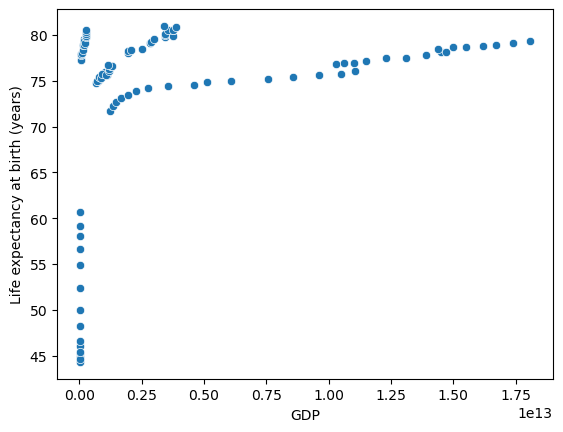

<Figure size 640x480 with 0 Axes>

In [4]:
sns.scatterplot(x='GDP', y='Life expectancy at birth (years)', data=df)
plt.show()
plt.clf()

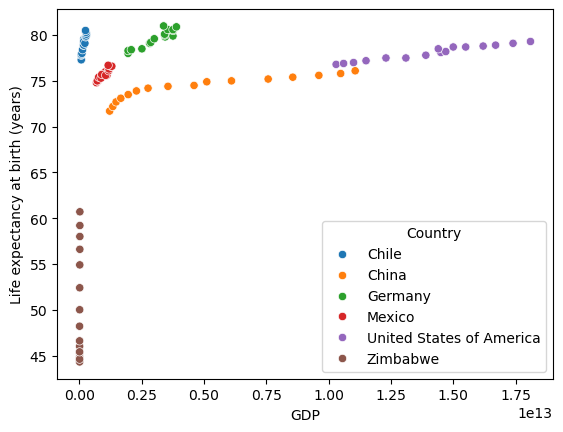

<Figure size 640x480 with 0 Axes>

In [5]:
# Let's seperate by country
sns.scatterplot(x='GDP', y='Life expectancy at birth (years)', data=df, hue='Country')
plt.show()
plt.clf()

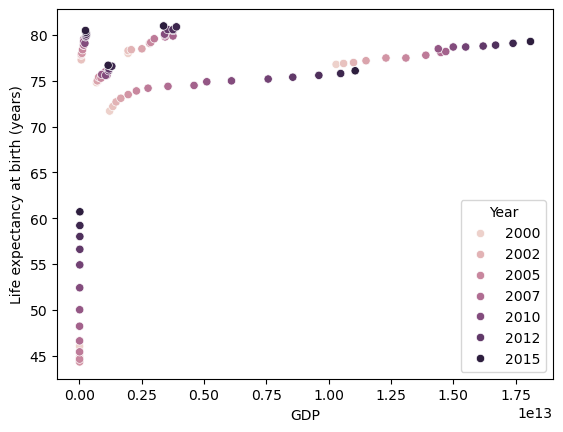

<Figure size 640x480 with 0 Axes>

In [6]:
# Each country has its own line and seems to grow over time.
# Let's cofirm our idea by using hue to represent year
sns.scatterplot(x='GDP', y='Life expectancy at birth (years)', data=df, hue='Year')
plt.show()
plt.clf()

In [7]:
# What we seem to be demonstraiting here is year is more correlative to life expectancy than GDP.
# Correlation coefficient between year and life expectancy
print(df['Year'].corr(df['Life expectancy at birth (years)']))

0.15504970687355407


In [8]:
# Correlation coefficient between GDP and life extectancy
print(df['GDP'].corr(df['Life expectancy at birth (years)']))

0.3432067484491559


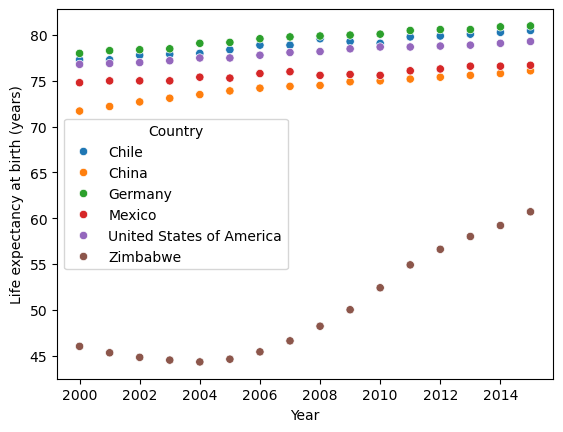

<Figure size 640x480 with 0 Axes>

In [9]:
# Let's graph life expectancy agaisnt Year
sns.scatterplot(x='Year', y='Life expectancy at birth (years)', data=df, hue='Country')
plt.show()
plt.clf()

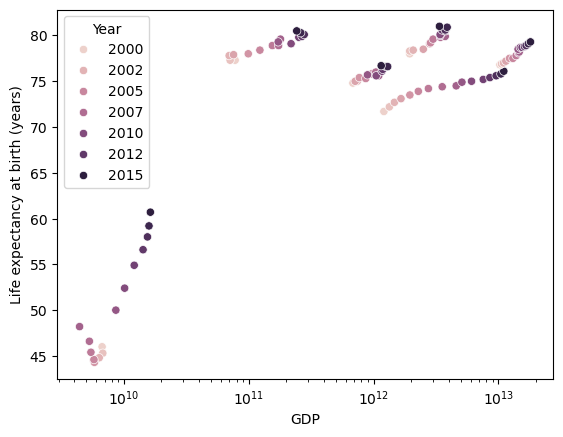

<Figure size 640x480 with 0 Axes>

In [12]:
# I was incorrect, time does not have a larger impact on life extectancy than year. 
# At 0.16 and 0.34, GDP is more than twice as correlative to life extactancy than year.
# I hypothesis that while Year looks more consistant, GDP is the main driver of life expectancy.
# Let's try to scale the graph log wise
sns.scatterplot(x='GDP', y='Life expectancy at birth (years)', data=df, hue='Year')
plt.xscale('log')
plt.show()
plt.clf()


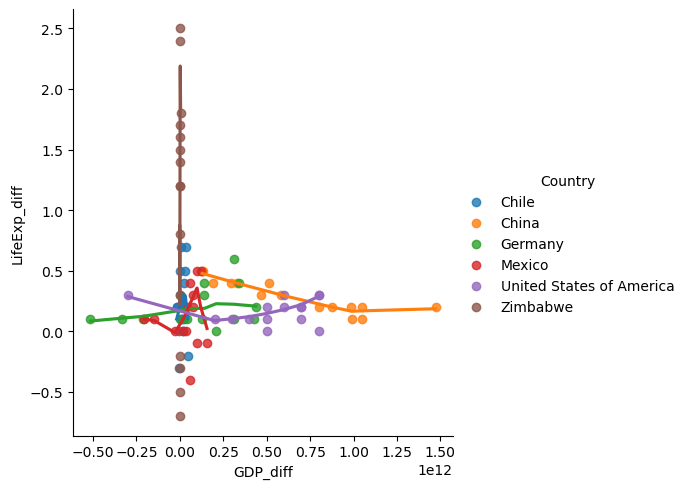

<Figure size 640x480 with 0 Axes>

In [24]:
# With the log scale, we can see the trend much clearer now. A clear positive coorelation is show  for GDP and life expectancy.
# Lets calculate a derivative of our data set and find our rate of change over time
df = df.sort_values(['Country', 'Year'])
df['LifeExp_diff'] = df.groupby('Country')['Life expectancy at birth (years)'].diff()
df['GDP_diff'] = df.groupby('Country')['GDP'].diff()
sns.lmplot(
    x='GDP_diff',
    y='LifeExp_diff',
    data=df,
    hue='Country',
    lowess=True,
)
plt.show()
plt.clf()

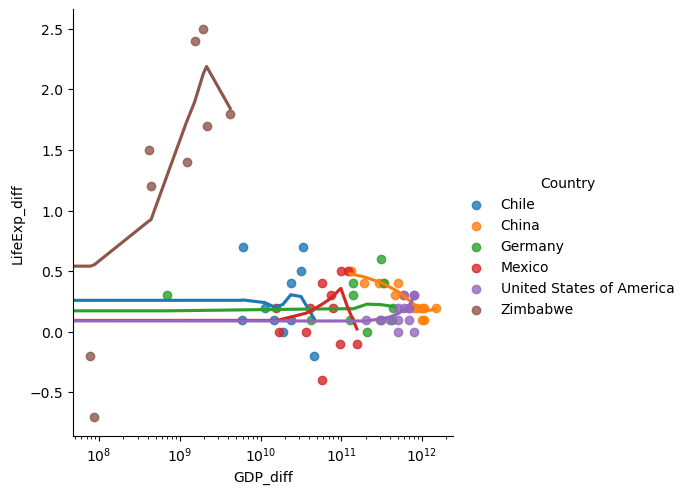

<Figure size 640x480 with 0 Axes>

In [26]:
# Our derivatives by country shows empirically that year to year GDP changes do not have an immediate effect on life expectancy. 
# While GDP has a strong correlative relationship with life expectancy, we cannot say an increase in GDP year to year would lead to a direct increase in life expectancy.
# Let's check with GDP as a log
sns.lmplot(
    x='GDP_diff',
    y='LifeExp_diff',
    data=df,
    hue='Country',
    lowess=True,
)
plt.xscale('log')
plt.show()
plt.clf()

Country
Chile                       1.697888e+11
China                       4.957714e+12
Germany                     3.094776e+12
Mexico                      9.766506e+11
United States of America    1.407500e+13
Zimbabwe                    9.062580e+09
Name: GDP, dtype: float64


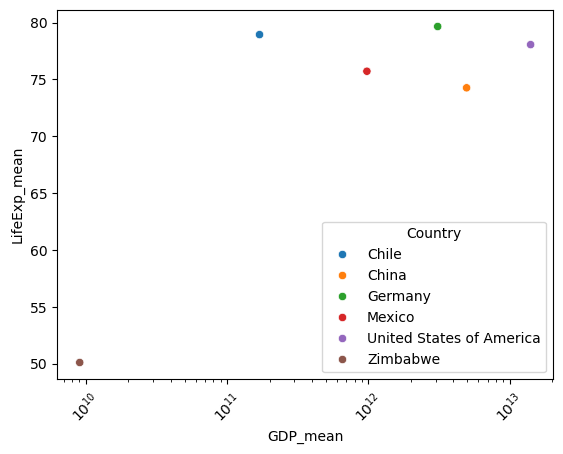

<Figure size 640x480 with 0 Axes>

In [49]:
# The data is easier to see and provides a key take away. Our low GDP country of Zimbabawe see's a clear improvement of life expectancy with GDP.
# This would suggest already established, high GDP countries gain very little short term life expectancy based on GDP gains. 
# Let's graph all of the averages for each country
#print(df.groupby('Country').describe())
GDP_mean = df.groupby('Country')['GDP'].mean()
LifeExp_mean = df.groupby('Country')['Life expectancy at birth (years)'].mean()
df_mean = pd.DataFrame({
    'Country': GDP_mean.index,
    'GDP_mean': GDP_mean.values,
    'LifeExp_mean': LifeExp_mean.values
})
print(GDP_mean)
sns.scatterplot(x='GDP_mean', y='LifeExp_mean', data=df_mean, hue='Country')
plt.xticks(rotation=45)
plt.xscale('log')
plt.show()
plt.clf()

In [51]:
# This graph shows that while GDP and life expectancy tend to move together at a broad level, the mean values per country show weak direct correlation. Countries with largely different GDPs share similar life expectancies past a threashold, implying diminishing returns on health outcomes for higher income levels.

# Year appears more consistently correlated with life expectancy than GDP does, suggesting that temporal factors have greater explanatory power than GDP alone. GDP co-varies with time and modernization effects.